<a href="https://colab.research.google.com/github/SURAJ0JAAT/GOOGLE-PLAY-STORE-ANALYSIS/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#import important library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#bring in the six packs
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Play Store App Review Analysis/Play Store Data.csv')

df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Play Store App Review Analysis/User Reviews.csv')

In [6]:
df1 = df.drop_duplicates()

In [7]:
df1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
 # using merge function by setting how='outer'
# data = pd.merge(df1, df2, 
#                   on='App',
#                    how='outer')



In [10]:
df1.columns.nunique()

13

# 1. `Cleaning Data`#

Dataset can contain missing data, numerical string value, various cues. If we can clean them, we can make easy our analysis.

```

### Show missing value in this Dataset:


In [11]:
df1.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Create a function for data cleaning:

In [12]:
#Create a function info_data:
def info_data():
    data=pd.DataFrame(index=df1.columns)
    data["Data_type"]=df1.dtypes
    data["Null Count"]=df1.isnull().sum()
    data["Unique_count"]=df1.nunique()
    return data

In [13]:
#Let's call the function and see what it returns:
info_data()

,Data_type,Null Count,Unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1465,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [14]:
#Show Null value in Type column:
df1[df1.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [15]:
#Fill missing value in this column;
df1["Type"].fillna("Free",inplace=True)

In [16]:
df1.Type.isnull().sum()

0

In [17]:
#Check missing value in Content Rating:
df1[df1["Content Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [18]:
#Drop null value in Content Rating:
df1.dropna(subset=["Content Rating"],inplace=True)

In [19]:
df1["Content Rating"].isnull().sum()

0

### Create a function for data cleaning:¶



In [20]:
df1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [21]:
df1['Category'].nunique()

33

#Rating

In [22]:
df1['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

###Data type of Rating is object. If we convert from string to numeric, we can make easy.

In [23]:
df1['Rating'] = pd.to_numeric(df1['Rating'], errors='coerce')
df1['Rating'].dtype

dtype('float64')

##Reviews

In [24]:
df1['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [25]:
df1[df1['Reviews'] =='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [26]:
df1['Reviews'] = df1.Reviews.replace("0.0",0)
df1['Reviews'] = df1.Reviews.replace("3.0M",3000000.0)
df1['Reviews'] = df1['Reviews'].astype(float)
df1['Reviews'].dtype

dtype('float64')

#Size

In [27]:
df1['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Data type of Size is object. I had to convert the column because it contains the application sizes. Firstly I changed 'Varies with device' value with Nan. After, I dropped 'M' and 'k'. I changed from '1000+' to 1000. Finally, I converted float value.


In [28]:
df1['Size'] = df1.Size.replace("Varies with device",np.nan)
df1['Size'] = df1.Size.str.replace("M","000") # All size values became the kilobyte type.
df1['Size'] = df1.Size.str.replace("k","")
df1['Size'] = df1.Size.replace("1,000+",1000)
df1['Size'] =df1['Size'].astype(float)
df1['Size'].dtype

dtype('float64')

#Installs


In [29]:
df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Data type of Size is object. I'm gonna make similar processes, which I made the in 'Size'.

In [30]:
df1['Installs'] = df1.Installs.str.replace(",","")
df1['Installs'] = df1.Installs.str.replace("+","")
df1['Installs'] = df1.Installs.replace("Free",np.nan)
df1['Installs'] = df1['Installs'].astype(float)
df1['Installs'].dtype

dtype('float64')

##Price

In [31]:
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

###Data type of Price is object. I have made similar processes, which I made the in 'Size'.

In [32]:
df1['Price'] = df1.Price.replace("Everyone",np.nan)
df1['Price'] = df1.Price.str.replace("$","").astype(float)
df1['Price'].dtype

dtype('float64')

#Last Updated

In [33]:
df1['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [34]:
df1['Last Updated'] = pd.to_datetime(df1['Last Updated'])
df1['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10357, dtype: datetime64[ns]

#Exploratory Data Analysis
After, I prepared to analyze our data, somewhat let's explore the datas. :)

corr() : It returns correlation.
describe (): It returns number of entries, average of entries, outlier values, standart deviation, minimum and maximum entry.

In [35]:
df1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068732,0.080156,0.050886,-0.022355
Reviews,0.068732,1.000000,0.233572,0.634997,-0.009417
Size,0.080156,0.233572,1.000000,0.168395,-0.023526
Installs,0.050886,0.634997,0.168395,1.000000,-0.011147
Price,-0.022355,-0.009417,-0.023526,-0.011147,1.000000


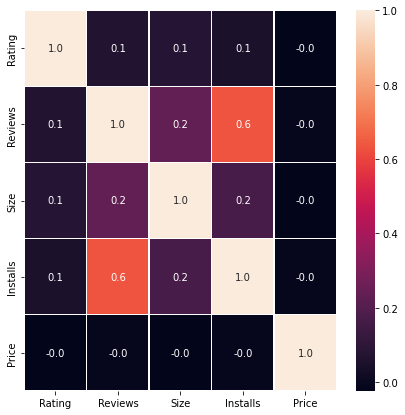

In [36]:
#correlation map
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [37]:
df1.describe()

,Rating,Reviews,Size,Installs,Price
count,8892.000000,1.035700e+04,8831.000000,1.035700e+04,10357.000000
mean,4.187877,4.059046e+05,19322.130517,1.415776e+07,1.030800
std,0.522377,2.696778e+06,23997.811234,8.023955e+07,16.278625
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.200000e+01,5.500000,1.000000e+03,0.000000
50%,4.300000,1.680000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,29000.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


## Let's see Free and Paid Apllication in Google Play Store:


In [38]:
import plotly.express as px

fig= px.pie(df1, names='Type', height=300, width=600, hole=0.7,

title='Show the Percentage of Free and Paid Application:',

color_discrete_sequence=['#FF34B3', 'skyblue'])

fig.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=90)

fig.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,

plot_bgcolor='#FDF5E6', paper_bgcolor='#FFFFFF',

title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))

#Category and Reviews

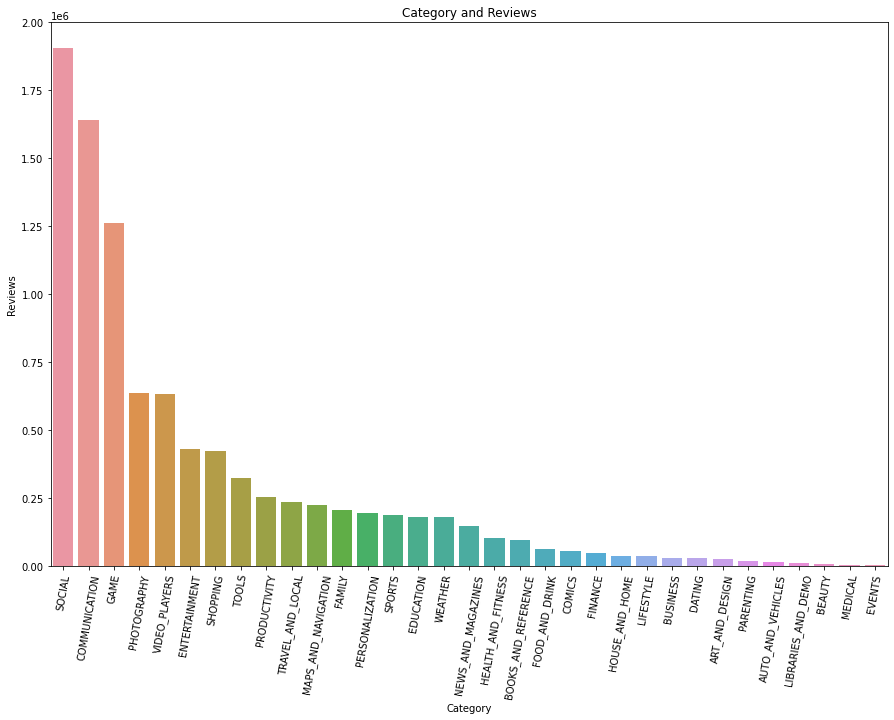

In [39]:
category_list = list(df1['Category'].unique())
category_review = []
for i in category_list:
    x = df1[df1['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)
#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

In [40]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#Category and Installs

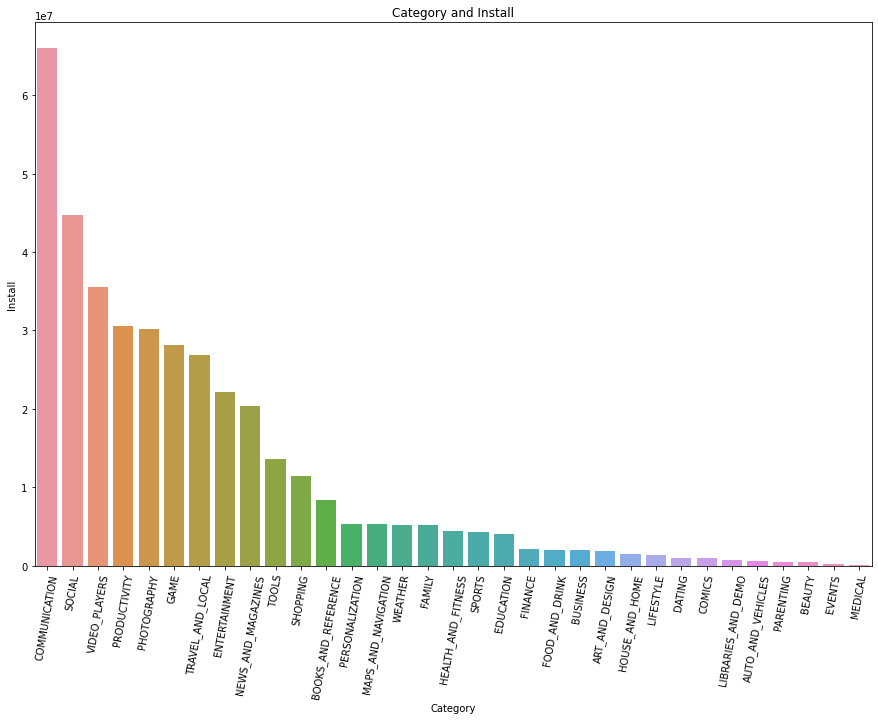

In [41]:
category_list = list(df1['Category'].unique())
category_install = []
for i in category_list:
    x = df1[df1['Category'] == i]
    if(len(x)!=0):
        install = sum(x.Installs)/len(x)
        category_install.append(install)
    else:
        install = sum(x.Installs)
        category_install.append(install)
        
#sorting
data_category_install = pd.DataFrame({'category': category_list,'install':category_install})
new_index = (data_category_install['install'].sort_values(ascending=False)).index.values
sorted_data =data_category_install.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['install'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Install")
plt.title("Category and Install")
plt.show()

# Word Cloud

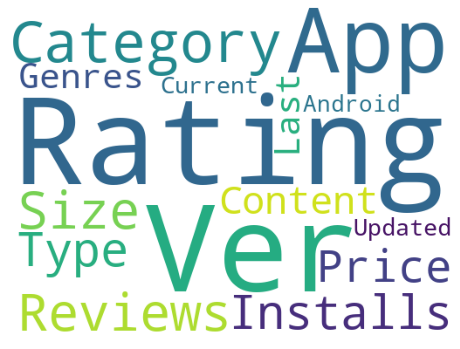

In [42]:
from wordcloud import WordCloud

plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(df1))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

## Let'see highest Installs apps according to Genres:
---



In [43]:
genre=pd.DataFrame(df1["Genres"].value_counts().sort_values(ascending=False).reset_index().rename(columns={"index":"Genres","Genres":"Count"})).head(10)

In [44]:
fig=px.pie(genre,values="Count",names="Genres",title="Show % of All installes Apps according to Genres",
           color_discrete_sequence=["#4A4F49","#959E92"])
fig.update_xaxes(showgrid=False)

fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)

fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))

fig.update_layout(margin=dict(t=80, b=0, l=70, r=40),hovermode="y unified",
                  xaxis_title=' ', yaxis_title=" ", height=300,plot_bgcolor='#333', paper_bgcolor='#333',
title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
 font=dict(color='#8a8d93'),
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="right", x=0.5),
                  hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))

## Show top10 Expensive Apps in the Google Play Store:

In [45]:
top10paid=df1[df1["Type"]=="Paid"].sort_values(by="Price",ascending=False).head(10)

In [46]:
fig=px.pie(top10paid,values="Installs",names="App",title="Top10 most expensive Apps",
           color_discrete_sequence=["lightpink","lightblue"])
fig.update_xaxes(showgrid=False)

fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)

fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))

fig.update_layout(margin=dict(t=80, b=0, l=70, r=40),hovermode="y unified",
                  xaxis_title=' ', yaxis_title=" ", height=450,plot_bgcolor='#333', paper_bgcolor='#333',
title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
 font=dict(color='#8a8d93'),
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="left", x=0.5),
                  hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))

In [47]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#Content Rating

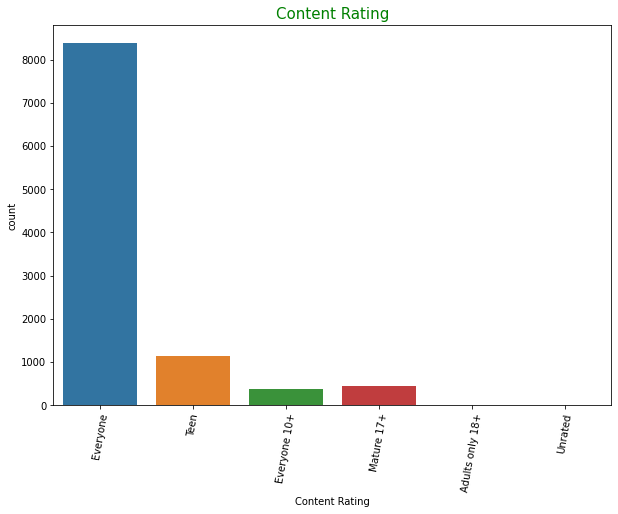

In [48]:
plt.figure(figsize=(10,7))
sns.countplot(data=df1, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'green',fontsize=15)
plt.show()

# Sentiment analysis of user reviews


In [49]:
df['sentiment', 'Translated_Review'].describe()

KeyError: ignored

In [ ]:
# Join and merge the two dataframe
df = pd.merge(df1, df2, on = "App", how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
df = df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = "Type", y = "Sentiment_Polarity", data = df)
ax.set_title('Sentiment Polarity Distribution')

# Hidden Data


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df2, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df2 = df2[[col for col in df2 if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df2.shape
    columnNames = list(df2)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df2.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df2, graphWidth):
    filename = df2.dataframeName
    df2 = df.dropna('columns') # drop columns with NaN
    df2 = df[[col for col in df2 if df2[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df2.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df2.shape[1]}) is less than 2')
        return
    corr = df2.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df2, plotSize, textSize):
    df2 = df2.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df2 = df2.dropna('columns')
    df2 = df2[[col for col in df2 if df2[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df2 = df2[columnNames]
    ax = pd.plotting.scatter_matrix(df2, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

# Graph


In [ ]:
plotPerColumnDistribution(df2, 10, 5)

# Conclusion

## After Analyzing the dataset, I have got answers to some of the serious &interesting question which any of the android users After this analysis is done, I want to take it one step further by deploying a Web App for answering to different questions of many users all around the globe, which may help different app developers before for making certain decision before starting their work